# Linear regression II

## Cost function

Lets delve a bit deeper and look at the <code>**cost fuction**</code> and what is it doing. I assume that you have some familiarity with contour plots. If not, some things may not make sense to you but it's okay.

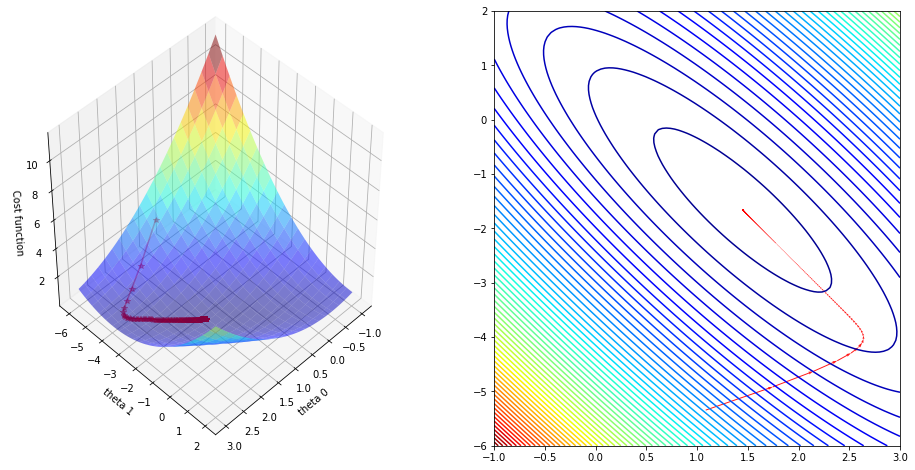

## Outline

<code>**Hypothesis**</code>:
\begin{multline*}
h_{\theta}(x) = \theta_{0} + \theta_{1}x
\end{multline*}

<code>**Parameters**</code>:
\begin{multline*}
\theta_{0}, \theta_{1}
\end{multline*}

<code>**Cost function**</code>:
\begin{multline*}
J(\theta_{0}, \theta_{1}) = \dfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)} ) -y^{(i)})^2
\end{multline*}

<code>**Goal**</code>:
\begin{multline*}
\min\theta_{0}, \theta_{1}  J(\theta_{0}, \theta_{1})
\end{multline*}

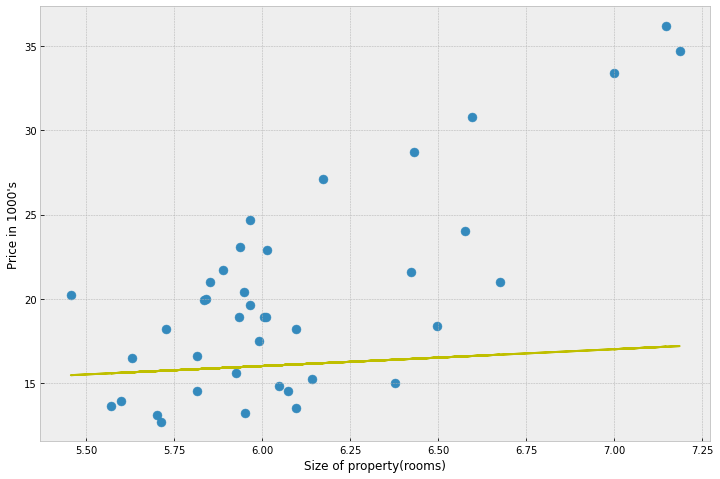

In [47]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.datasets import load_boston

plt.style.use('bmh')
plt.figure(figsize=(12,8))

data_set = load_boston()
x = data_set.data[:40,5]
y = data_set.target[:40]

theta_0 = 10
theta_1 = 1

y_hat =  theta_0 + theta_1 * x

plt.plot(x, y_hat, '-y')
plt.scatter(x, y, s=80)

plt.xlabel("Size of property(rooms)")
plt.ylabel("Price in 1000's")
plt.show();

We will keep now both parameters <code>**θ 0 and θ 1**</code> on visualizations for cost function. So at the last lecture [__linear_regression_I](./__linear_regression_I.ipynb) we had same training set. And lets make some hypothesis again. While initial theta parameters are  <code>**θ 0 = 10 and θ 1 = 1**</code> we end up with hypothesis:

$$h_{\theta}(x)= 10 + 1x$$

And obviously its not very good hypothesis. 

Given these values for parameters we want to plot coresponding cost function J.
Since last time when we had only single theta parameter and our plot was just planar. But now we have two parameters and our plot gets a bit more complicated. With single parameter our cost function had a bowl shape (parabola) and now with two parameters J function has a similar sort of bowl shape <code>**convex**</code>. And in fact depending in our training set you might get cost function of different forms

<br>

\begin{multline*}
J(\theta_{0}, \theta_{1})
\end{multline*}


<IPython.core.display.Javascript object>


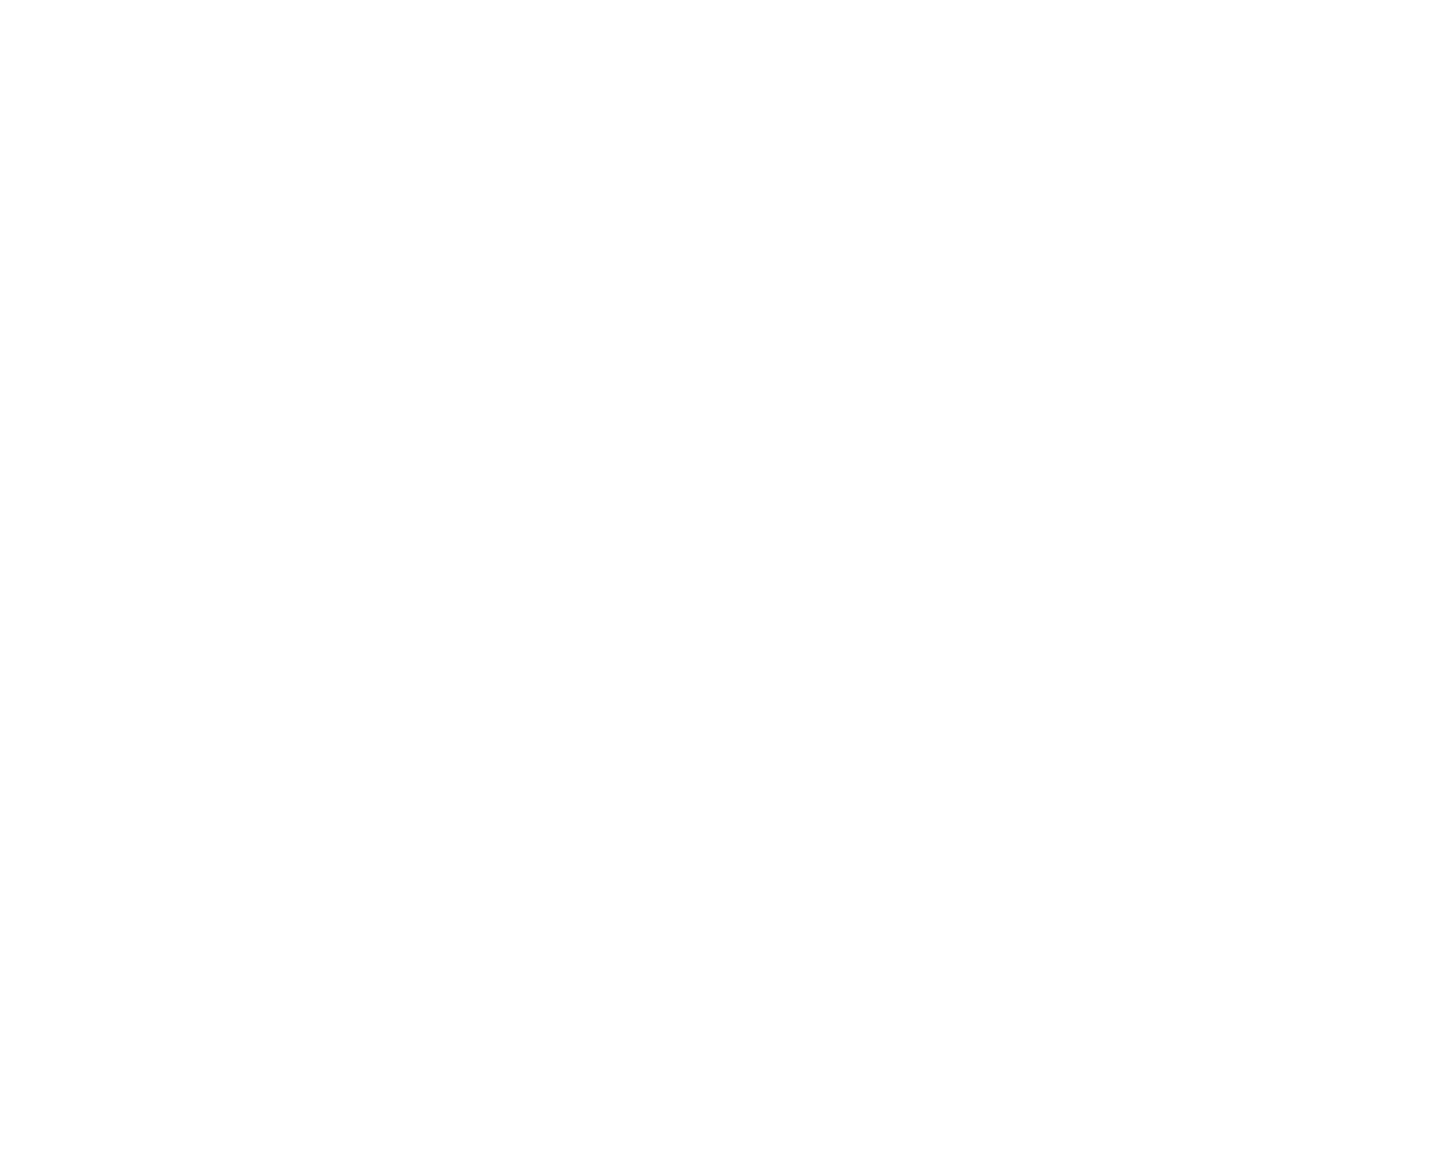

<IPython.core.display.Javascript object>


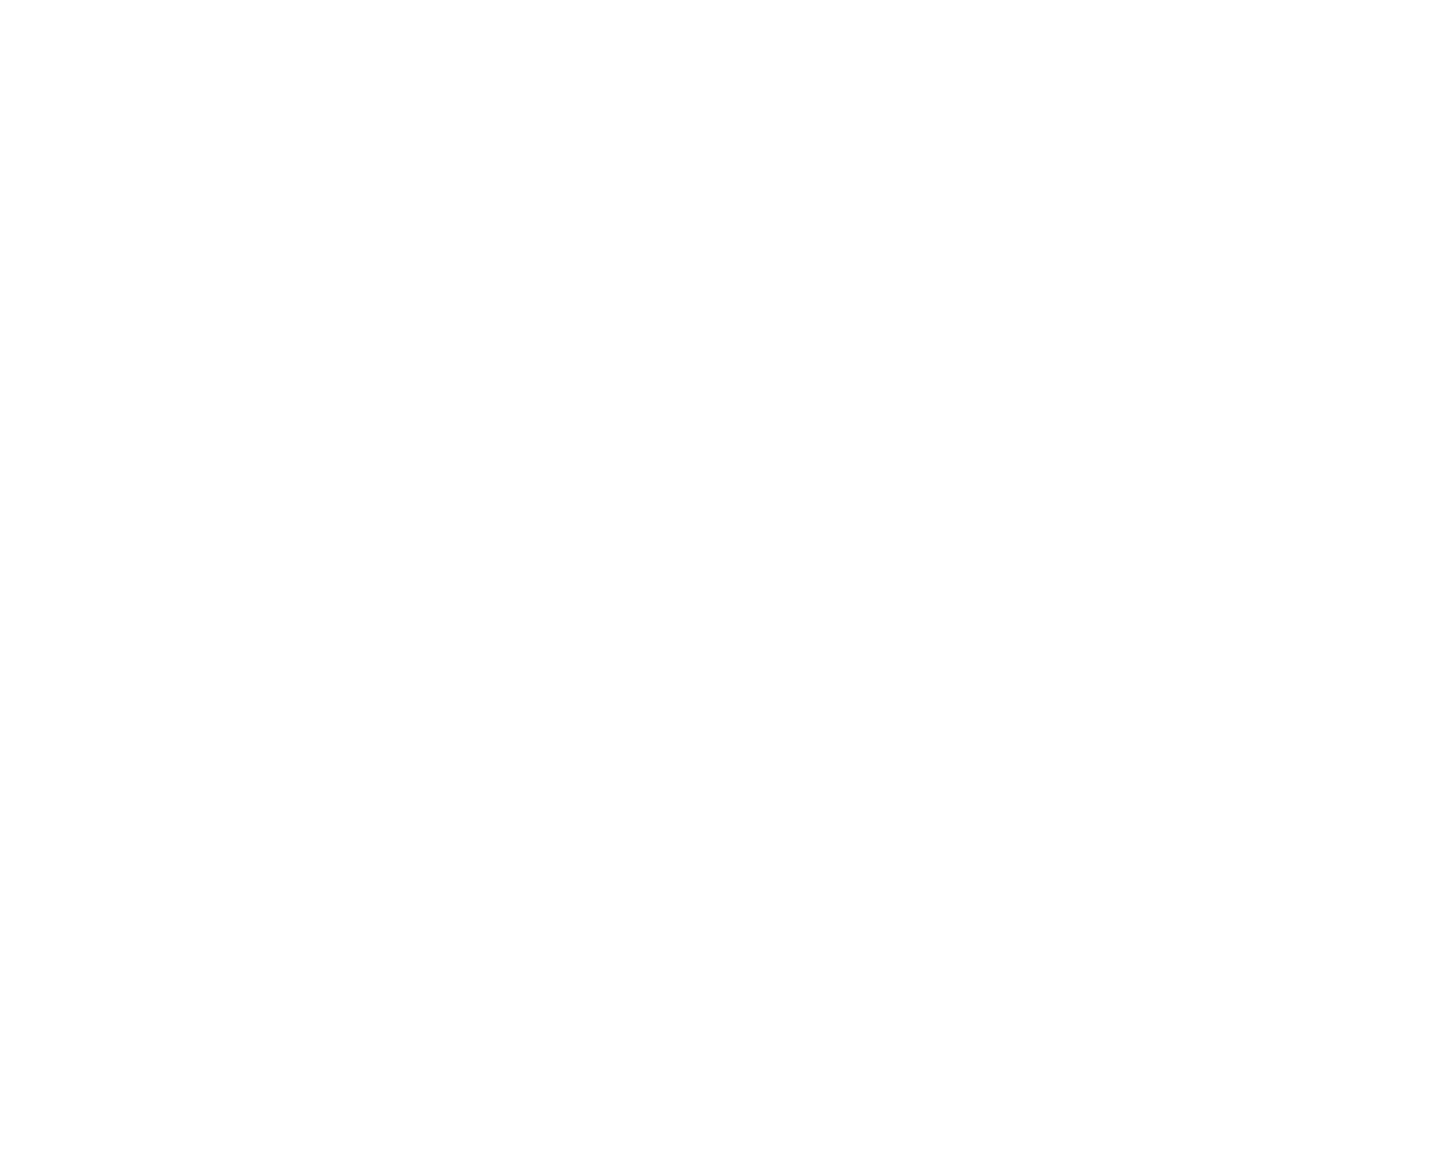

In [56]:
%matplotlib notebook
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10, 8),  subplot_kw={'projection': '3d'})
alpha = 1
r = np.linspace(-alpha,alpha,25)
X,Y= np.meshgrid(r,r)
l = 1./(1+np.exp(-(X**2+Y**2)))
ax.plot_surface(X, Y, l, cmap = 'rainbow')
ax.set_xlabel('θ 0')
ax.set_ylabel('θ 1')
ax.set_zlabel('J(θ 0,θ 1)')
ax.view_init(45, 45)
plt.show();

Its a 3D surface plot that looks like bowl like shape. Where the axis are labeled  θ 0 and θ 1. As we varry our parameters we get different values of the cost function J(θ 0, θ 1). And the height of this surface above θ 0 and θ 1 indicates the value of <code>**J(θ 0,θ 1)**</code>
But further for simplicity and convenience sake we will use <code>**[contour plots](https://www.youtube.com/watch?v=acdX4YamDtU) <<<**</code> (Thas a good video to get familiar with controur plots) to demonstrate this surfaces.<br>
And example contour figure below where the axes are theta parameters. <br>
<code>**And each of this oval show set of points that takes on the same value for J(θ 0,θ 1), I marked three (black) x values that all have the same value for J(θ 0,θ 1)**</code>


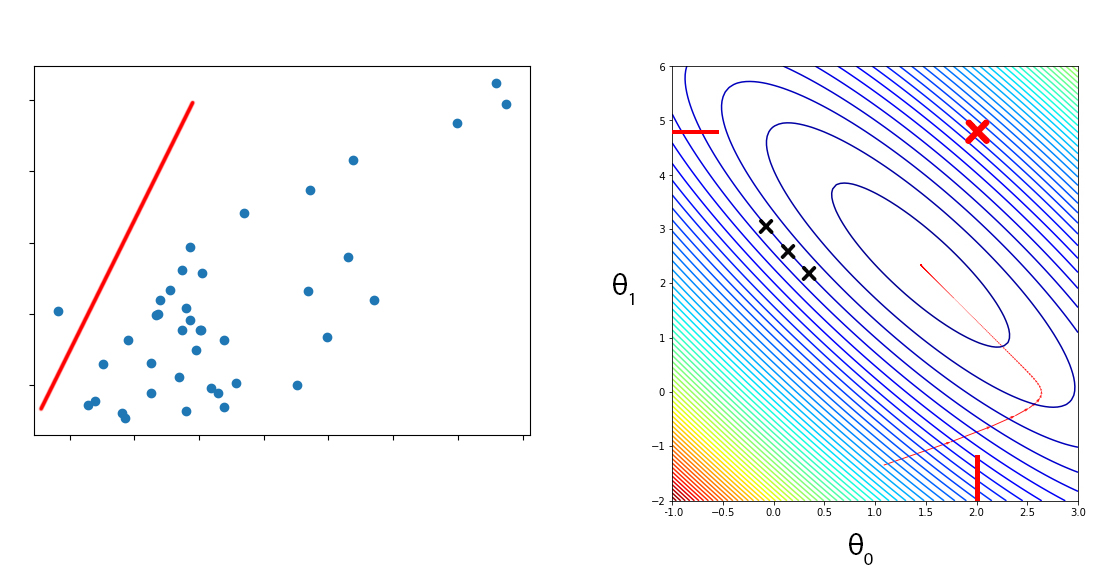

We have a particulalr point. And this is where theta 0 equal ~ 2 and theta 1 equal ~ 4.8. This one particular point coresspond to one set of pair values of theta parameters and they correspond to some hypothesis. Which i can tell is not a best fit to the data. Because its cost out there is pretty far away from the <code>**minimum**</code>,  <code>**it's too high cost for us!**</code>

But eventually trying different values the sum of square errors or sum of square distances between hypothesis and trainig samples will get close to the optimal minimum.

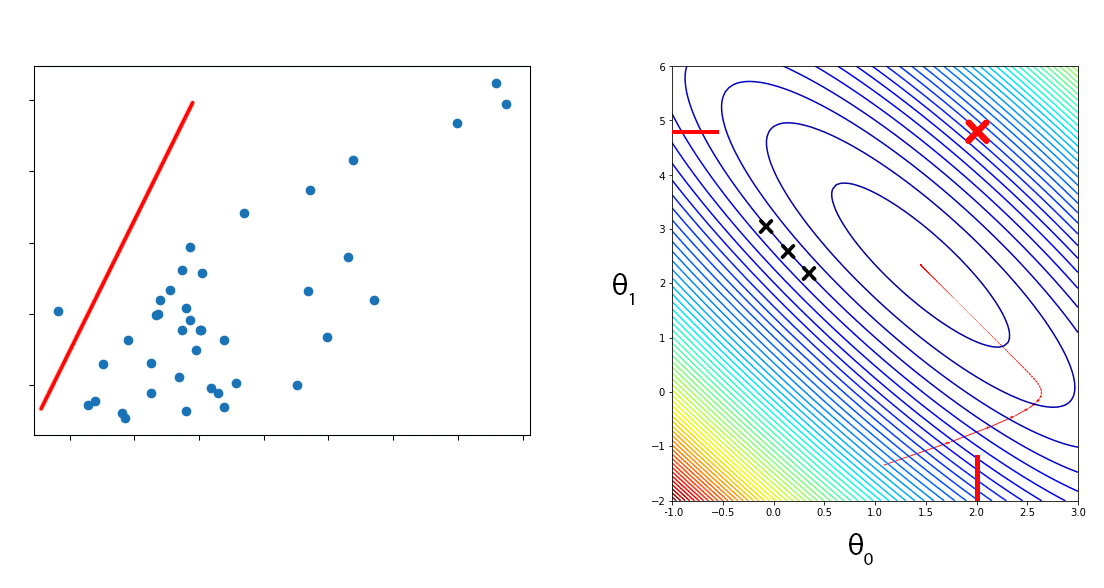

With all of these figure, we have some understanding how values of the cost function J corresponds to different hypothesis and so as how better hypothesis can correspond to points that are closer to the minimum of this cost function J. So in reality what we want is an <code>**efficient algorithm for effective finding the value of theta parameters that minimizes the cost function J.**</code>


## Gradient descent intuition

[The most beatiful video I have ever seen on gradient descent algorithm visualization](https://losslandscape.com/)

<code>**This is algorithm  that we will use for minimizing our cost function J**</code>. Actually its more general algorithm and its not used only in linear regression. <code>**More formally this algorithm captures all the partial derivatives of a multi-variable function**</code>

Its used all over the field of machine learning and can be used to minimize other functions as well, not just the cost function. Gradient descent is omnipresent in the training of neural networks and other machine learning models. Each time you have a model which parameters are updated during the training according to a cost function, you can be almost certain that there is gradient descent under the hood.

Firsly lets discuss the minimazation of some arbitraty function J and later take this algorithm and apply it specifically to the cost function J that we have defined for linear regression.




So this is our problem setup. We are going to assume that we have some function J with two parameters and maybe its a cost function from our linear regression that we want to minimize. We want to come up with an algorithm for minimizing that function. Aside it turn outs that gradient descent actually applies to more general functions.<br>
\begin{multline*} J(\theta_0, \theta_1,\theta_2, ..., \theta_n)\end{multline*} and we want to minimize
\begin{multline*}
\min\theta_0, ..., \theta_n \ J(\theta_0,...,\theta_n)
\end{multline*}

Gradient descent turns out to be good algorithm for solving this more general problem. But for the sake of shortness we are going to <code>**pretend that we have only two parameters**</code>. So we will start with some <code>**initial guesses for parameters**</code>and it doesn't matter what they are but common choice would be to <code>**set them both to zero**</code>
And in gradient descent we will keep chaning both parameters a little bit and try to reduce J(θ 0,θ 1) until end up at a minimum or maybe at a local minimum.

## Outline

<code>**We have some function**</code>:

\begin{multline*}
J(\theta_0, \theta_1)
\end{multline*}

<code>**We want**</code>:
\begin{multline*}
\min\theta_0, \theta_1 J(\theta_0, \theta_1)
\end{multline*}

<code>**Star with some initial values for parameters**</code>:
\begin{multline*}
\theta_{0} = \theta_{1} = 0
\end{multline*}

<code>**Keep changing parameters to reduce**</code>:
\begin{multline*}
J(\theta_0, \theta_1)
\end{multline*}

<code>**Until we end up at a minimum**</code>


Let's say you're trying to minimize this function. Notices the axes. The height of this surface shows J and we to minimize this function. So we start with theta 0 and theta 1 at some point and that corresponds to that <code>**Big black X**</code>. So whatever value of theta parameters gives you some point here. Now imagine that this is like a landscape with hills and you are physically at that point  on this red hill. In <code>**gradient descent**</code> we are going to do is spin 360°, look around and <code>**take a little step in some direction but you want to go downhill as quickly as possible. What direction should you take that step downhill?**</code> As soon you figure out which direction it is you make that one single little step. And now you're at this new point on hill, and you repeat the same process again. And keep going untill you converge to this <code>**local minimum**</code> denoted with <code>**big white X**</code>

________________________________

<code>**Convergence - is a name given to the situation where the loss function does not improve significantly, and we are stuck in a point near to the minima.**</code>



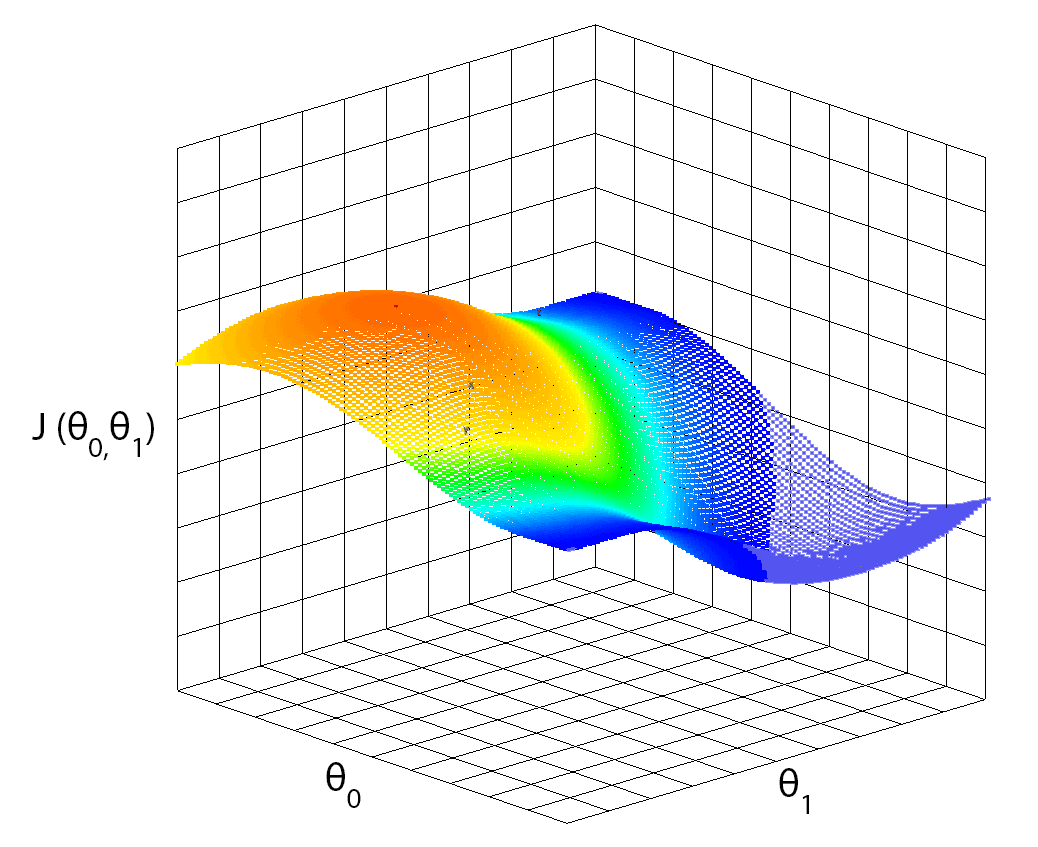

Interesting property of gradient descent is that if you start from different location (initialize with different theta parameters) you can end up in different local minimum if there are few of them in your surface. This popety of <code>**GD (gradient descent)**</code> that we will have to deal heavily later.

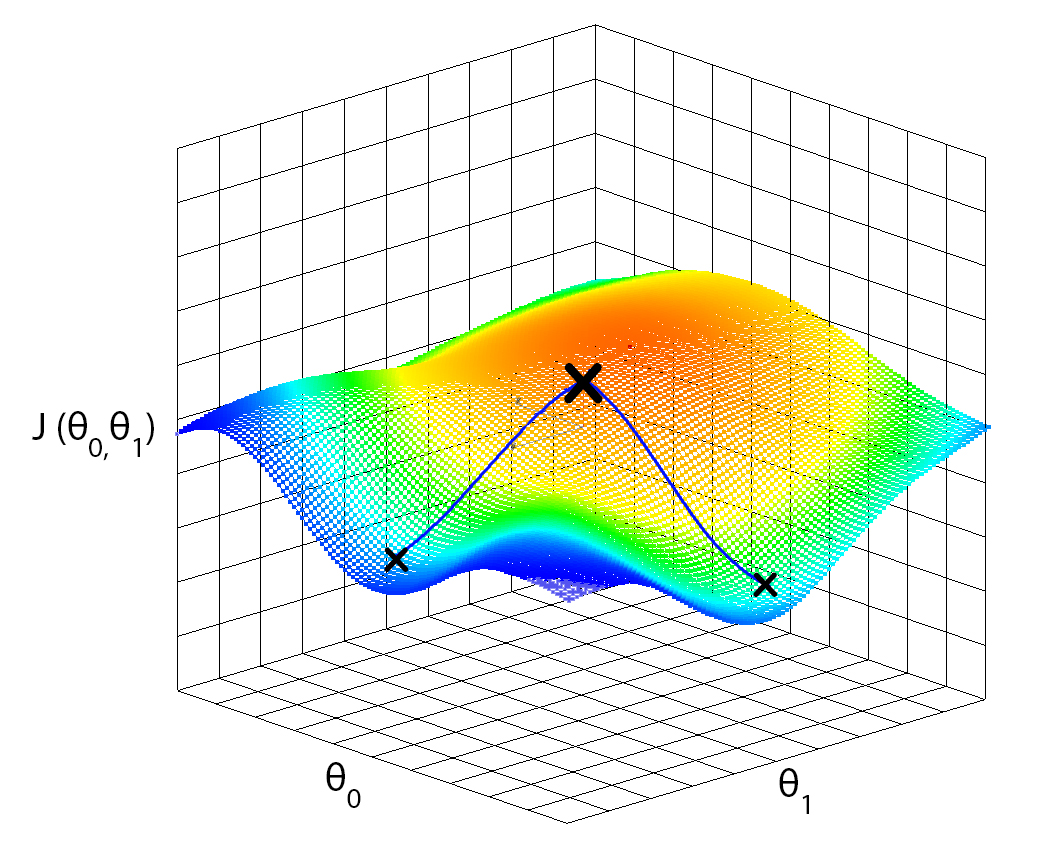

## Gradient descent math

Definition of gradient descent algorithm. <code>**We must repeatedly do this until convergence**</code>. We're going to update our parameter theta by taking the parameter and subtracting from alpha times this partial derivative term

`repeat until convergence (for j = 0 and j = 1){
`\begin{multline*}
\theta_{j}:= \theta_{j} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\theta_{0}, \theta_{1})
\end{multline*}
`}`

There are some details in this equation let's unpack some of it:<br>
* <code>**:= is value assignment, in case of a:=b, means set a to be equal to the value of b**</code><br>
<br>
* <code>**α is a number that is called the learning rate, basically it controls how big a step we take downhill**</code><br>
<br>
* \begin{multline*} \dfrac{\partial}{\partial\theta_{j}} J(\theta_{0}, \theta_{1}) \end{multline*} this term is a derivative, if youre not familiar with calculus don't worry we will go through it <code>**in side course lectures about differential calculus**</code> but essentially <code>**in simpler terms, the derivative is the rate of change or the slope of a function at a given point**</code>

In GD were going to update theta parameters, and we have to <code>**do it simultaneously**</code>

\begin{multline*}
temp_{0} := \theta_{0} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\theta_{0}, \theta_{1}) 
\end{multline*}
\begin{multline*}
temp_{1} := \theta_{1} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\theta_{0}, \theta_{1})
\end{multline*}
\begin{multline*}
\theta_{0} := temp_{0} \newline
\end{multline*}
\begin{multline*}
\theta_{1} := temp_{1} \newline
\end{multline*}

It's quite hairy to explain why we have to do it simultenously but it depends on the way how GD is ussualy implemented that will dig into later. It's happens to be more predictible to implement the simultaneous updates, it will still work without simultaneous update but that will have different properties that makes it behave in strange ways.

## Practice exercise


Suppose <code>**θ 0 = 1, θ 1= 2**</code> and we do simultaneously update on θ0 and θ1 using rule: <br>

\begin{multline*}\theta_{j} := \theta_{j} + \sqrt{\theta_{0}\theta_{1}}\end{multline*}
(for j = 0 and j = 1) 
<br>

What are the result values of θ 0, θ 1 ? <code>**right answer is in the end of lecture, above draft section**</code>

## Derivative term

We have some mathematical definition of gradient descent algorithm. Lets delve deeper and see what is it doing.

`repeat until convergence (for j = 0 and j = 1){
`\begin{multline*}
\theta_{j}:= \theta_{j} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\theta_{0}, \theta_{1})
\end{multline*}
`}`

It is composed of two terms:
* Learning rate <code>**α**</code> basically it controls how big a step we take downhill, <code>**WHILE UPDATING OUR PARAMETERS**</code>

* Derivative \begin{multline*}\dfrac{\partial}{\partial\theta_{j}} J(\theta_{0}, \theta_{1})\end{multline*}

### Simplified term

Lets simplify this term by reducing to one parameter as we did with hypothesis intuition. Let say we have cost function J(θ) with single parameter that is a real number and we want to minimize this function. Lets see what gradient descent will do on this function <code>**(notion changed just due mathematical technicalities of derivatives and partial derivates that depends on numbers of parameters in function J. Just reason about them as exactly the same thing)**</code>

\begin{multline*}
\theta_{1} := \theta_{1} - \alpha \dfrac{d}{d\theta_{1}} J(\theta_{1})
\end{multline*}

### To cacluate derivates

We must get familiar with concepts of:
 - <code>**Power rule**</code>
 - <code>**Chain rule**</code>
 - <code>**Partial derivatives**</code>

### Powe rule

\begin{multline*}
y = x^{n}
\end{multline*}

\begin{multline*}
\dfrac{dy}{dx} = n \times x^{n-1}
\end{multline*}

___________________________________

\begin{multline*}
f(x) = x^{2}
\end{multline*}

\begin{multline*}
\acute{f}(x) = 2x
\end{multline*}

### Chain rule

\begin{array}{cc} 
y = f(x) \\
& & \Rightarrow &  \dfrac{dy}{dz} = \dfrac{dy}{dx}  \times \dfrac{dx}{dz} \\
x = g(z)  
\end{array}

### Partial derivatives ➜ with multiple variables

\begin{multline*}
z = f(x,y) = 3x^{2} + 2xy + 3y^{2} + 2x^{3}y
\end{multline*}

So how <code>**z**</code> changes only relative to x or only relative to y ? This is knowed as a <code>**partial derivative**</code>. We are looking for:

\begin{multline*}
\dfrac{\partial z}{\partial x} =  6x + 2y + 6yx
\end{multline*}

\begin{multline*}
\dfrac{\partial z}{\partial y} = 2x + 3y^{2} + 9x^{2}
\end{multline*}

We compute this derivate and it says let's take the tangent to that point like a straight line that touches this function(colored in red). And now look at the slope of this tangent line, thats a derivative. <code>**Slope is rise over run**</code>, height over length. And this line has a positive slope thus it has a positive derivative. So our update to theta is going to be:

\begin{multline*}
\theta_{1} := \theta_{1} - \alpha (\text{positive number})
\end{multline*}

So theta gets minus something and we end up moving theta parameter to the left closer to the minimum.

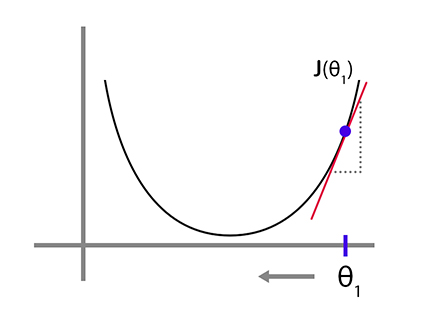

So far it looks GD is doing a right thing.Lets analyze another example with similar conditions except our parameter was initialized in different place. Now our derivative term when evaluated to this point will have a line sliding down, so it has a negative slope or we can say that this function has a negative derivative at that point.So our update to theta is going to be:

\begin{multline*}
\theta_{1} := \theta_{1} - \alpha (\text{negative number})
\end{multline*}

So we have theta minus a negative number which means we are going to increase theta, which seems the right thing to do to get closer to the minimum.

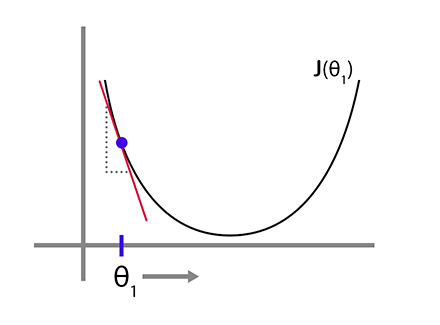

Since we have some intuition what a derivative is doing. Now lets take a look at learning rate alpha and what its doing. 

\begin{multline*}
\theta_{1} : = \theta_{1} - \alpha \dfrac{\partial}{\partial \theta_{1}}J(\theta_{1})
\end{multline*}

If alpha is to small GD will be slow. And we gonna need a lot of steps before it gets anywhere close to the global minimum.
If it is to large GD can overshoot the minimum failing to converge even diverge. Lets say we start somewhere near minimum. So the derivative point to the right but alpha is too big it will take a huge step and get even worse. After second step derivative points to the left it hints to decrease theta but our learning rate is too big so me make another huge step and so on. Actually we are getting further from the minimum.

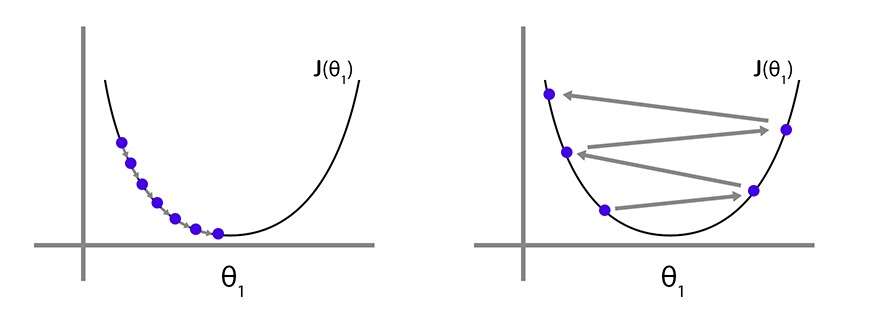

We know that when the learning rate is too low, it takes many steps to converge. On the other hand, when the learning rate is too high, Gradient Descent fails to reach the minimum, as seen in the visualization below

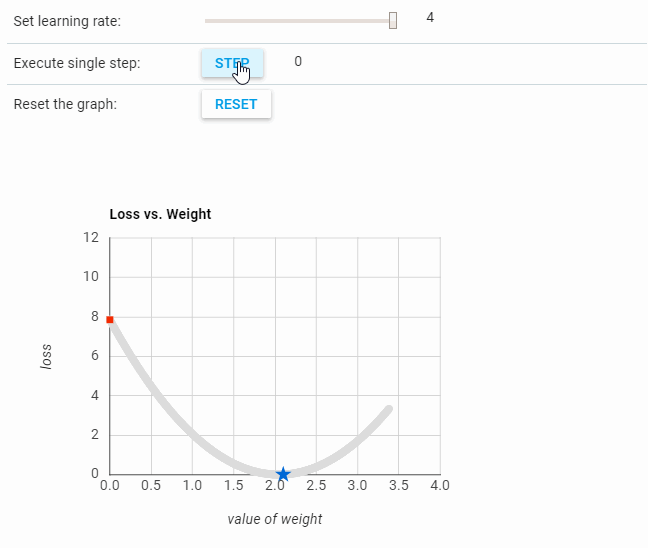

## Practice exercise

What if <code>**theta is already at local minimum**</code>, how do you think what one gradient descent step will do ?

Learning rate α can be fixed and gradient descent can converge to a local minimu with that condinion. As we approach a local minimum, gradient descent will automatically take smaller steps <code>**because derivative slope will be less steep with each steps closer to the minimum eventually becoming 0**</code>so there is no need to decrease α over time.

This is gradient descent algorithm and it can be used to try to minimze any cost function J not only the one that we defined for linear regression. Next step is to use it back exactly on linear regression cost function <code>**mean square error function**</code> that we come up earlier. So taking gradient descent and cost function and putting them together that will be our first <code>**learning algorithm**</code>

Practice exercise answer:<br>
θ1 = 1 + √2 <br>
θ2 = 2 + √2

## Draft

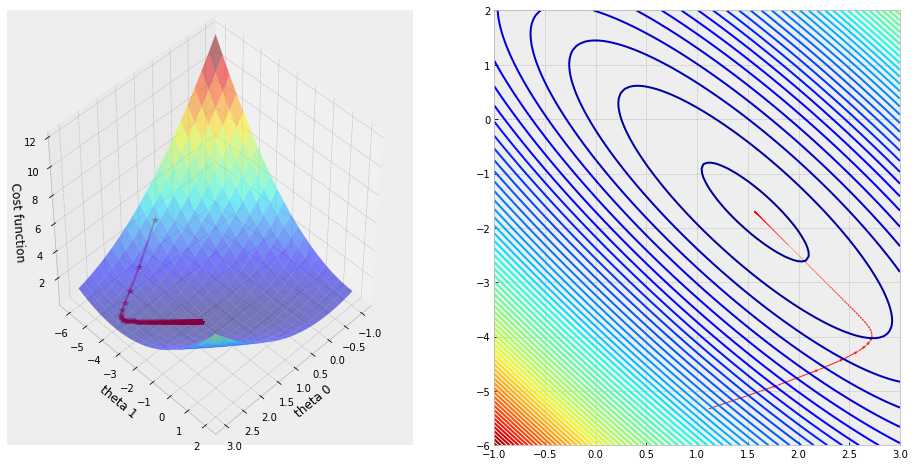

In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def costfunction(X,y,theta):
    m = np.size(y)

    #Cost function in vectorized form
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;


def gradient_descent(X,y,theta,alpha = 0.0005,num_iters=1000):
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(num_iters)
    theta_0_hist, theta_1_hist = [], [] #For plotting afterwards

    for i in range(num_iters):
        #Grad function in vectorized form
        h = X @ theta
        theta = theta - alpha * (1/m)* (X.T @ (h-y))

        #Cost and intermediate values for each iteration
        J_history[i] = costfunction(X,y,theta)
        theta_0_hist.append(theta[0,0])
        theta_1_hist.append(theta[1,0])

    return theta,J_history, theta_0_hist, theta_1_hist

#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)
X = np.vstack((np.ones(len(x)),x)).T


#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(-1,3,100),np.linspace(-6,2,100))

#Computing the cost function for each theta combination
zs = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)


#Computing the gradient descent
theta_result,J_history, theta_0, theta_1 = gradient_descent(X,y_noise,np.array([0,-6]).reshape(-1,1),alpha = 0.3,num_iters=1000)

#Angles needed for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
# ax.set_title('Gradient descent: Root at {}'.format(theta_result.ravel()))
ax.view_init(45, 45)


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()